# Выбор локации для скважины

## Описание Данных:

Данные геологоразведки трёх регионов находятся в файлах:
- https://code.s3.yandex.net/datasets/geo_data_0.csv
- https://code.s3.yandex.net/datasets/geo_data_0.csv
- https://code.s3.yandex.net/datasets/geo_data_0.csv
- **id** — уникальный идентификатор скважины;
- **f0, f1, f2** — три признака точек (неважно, что они означают, но сами признаки значимы);
- **product** — объём запасов в скважине (тыс. баррелей).

## Цели проекта

- Прогнозирование и оценка объемов запаса сырья в 200 лучших скважинах в каждом из регионов (по 100000 скважин в каждом)
- Построение модели машинного обучения для определения региона с наибольшей прибылью после разработки месторождений нефти.
- Создание функции для расчета прибыли по выбранным скважинам и предсказаниям модели
- Проанализировать возможную среднюю прибыль и риски убытков техникой bootstrap.

## Задачи проекта

- Предобработка данных
- Обучение и проверка линейной модели
- Расчёт достаточного объёма сырья для безубыточной разработки одной новой скважины
- Поиск 95%-й доверительного интервала для каждого региона
- Расчёт средней прибыли и риска убытков для каждого региона техникой bootstrap

## Итоги

- Рекомендован регион для разработки с максимальной оценкой прибыли.
- Оценка средней прибыли для выбранного региона 515.22 млн.руб.
- Только данный регион прогнозирует прибыльную разработку по 95% доверительному интервалу.
- Риск убытков для выбранного региона составляет 1%.

## Используемый стек инструментов

- python
- pandas
- numpy
- sklearn
- scipy
- matplotlib
- seaborn

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import RandomState
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# читаем данные из .csv файла с помощью метода read_csv()
try:
    geo_data_0 = pd.read_csv('D:\\python\\project_8\\geo_data_0.csv')
    geo_data_1 = pd.read_csv('D:\\python\\project_8\\geo_data_1.csv')
    geo_data_2 = pd.read_csv('D:\\python\\project_8\\geo_data_2.csv')
except:
    geo_data_0 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv')
    geo_data_1 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv')
    geo_data_2 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv')

# выведем первые 10 строк каждой таблицы с помощью метода head()
print('geo_data_0:')
display(geo_data_0.head(10))
print('geo_data_1:')
display(geo_data_1.head(10))
print('geo_data_2:')
display(geo_data_2.head(10))

geo_data_0:


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


geo_data_1:


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


geo_data_2:


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


In [3]:
# с помощью метода info() изучим структуру таблицы: типы данных, количество строк, столбцов, пропущенных данных.
print('geo_data_0:')
geo_data_0.info()
print('')
print('geo_data_1:')
geo_data_1.info()
print('')
print('geo_data_2:')
geo_data_2.info()

geo_data_0:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

geo_data_1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

geo_data_2:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (tot

Судя по исходным данным нам предоставлены пробы нефти в трёх регионах трех регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. 

Загруженные данные состоят из 100 000 строк. Есть вероятность, что в данных присутствуют дубликаты месторождений. Или в каждом из регионов 100 000 месторождений.

In [4]:
#Проверка на наличие дубликатов
print('geo_data_0, количество дубликатов: ',geo_data_0.duplicated().sum())
print('geo_data_1, количество дубликатов: ',geo_data_1.duplicated().sum())
print('geo_data_2, количество дубликатов: ',geo_data_2.duplicated().sum())

geo_data_0, количество дубликатов:  0
geo_data_1, количество дубликатов:  0
geo_data_2, количество дубликатов:  0


Явные дубликаты отсутствуют. Произведем проверку на неявные дубликаты:

In [5]:
#Уникальные значения таблиц
display(geo_data_0.nunique())
display(geo_data_1.nunique())
display(geo_data_2.nunique())

id          99990
f0         100000
f1         100000
f2         100000
product    100000
dtype: int64

id          99996
f0         100000
f1         100000
f2         100000
product        12
dtype: int64

id          99996
f0         100000
f1         100000
f2         100000
product    100000
dtype: int64

Наблюдаем небольшое количество дубликатов (всего до 20) в столбцах id. Возможно данные взяты повторно в скважинах  с одинаковым id, то есть одних и тех же скважинах.

В столбце product — объём запасов в скважине (тыс. баррелей) всего лишь 12 уникальных значений. Рассмотрим подробнее.

In [6]:
display(geo_data_0.describe())
display(geo_data_1.describe())
display(geo_data_2.describe())

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


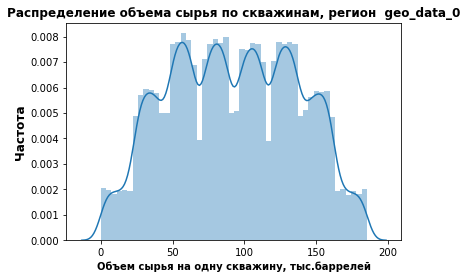

In [7]:
import warnings
warnings.filterwarnings('ignore')

sns.distplot(geo_data_0['product']);
plt.xlabel('Объем сырья на одну скважину, тыс.баррелей',fontsize=10, weight = 'bold')
plt.ylabel('Частота',fontsize=12, weight = 'bold')
plt.title("Распределение объема сырья по скважинам, регион  geo_data_0",fontsize=12, weight = 'bold');

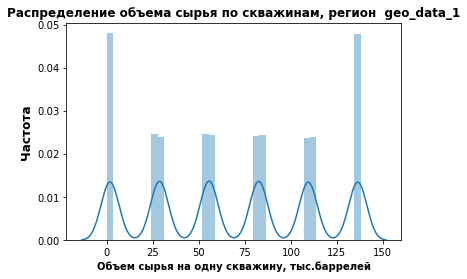

In [8]:
sns.distplot(geo_data_1['product']);
plt.xlabel('Объем сырья на одну скважину, тыс.баррелей',fontsize=10, weight = 'bold')
plt.ylabel('Частота',fontsize=12, weight = 'bold')
plt.title("Распределение объема сырья по скважинам, регион  geo_data_1",fontsize=12, weight = 'bold');

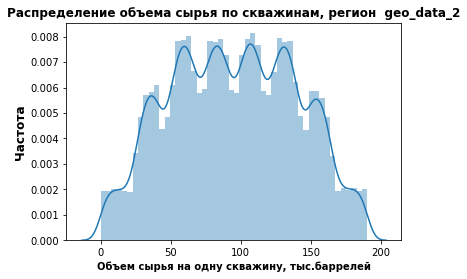

In [9]:
sns.distplot(geo_data_2['product']);
plt.xlabel('Объем сырья на одну скважину, тыс.баррелей',fontsize=10, weight = 'bold')
plt.ylabel('Частота',fontsize=12, weight = 'bold')
plt.title("Распределение объема сырья по скважинам, регион  geo_data_2",fontsize=12, weight = 'bold');

Значения в гистограммах распределены отлично от нормального распределения. Особенно выделяется geo_data_1 распределение, возможно данные там сформированы искусственно.

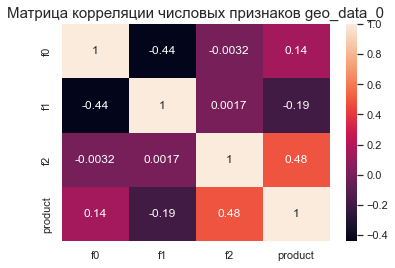

In [10]:
sns.set(font_scale=1)
sns.heatmap(geo_data_0.corr(), annot=True)
plt.title('Матрица корреляции числовых признаков geo_data_0', fontsize=15)

plt.show()

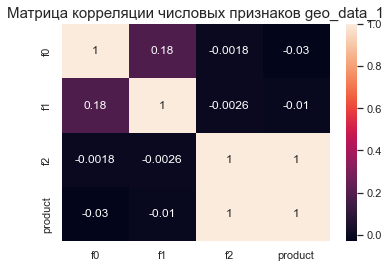

In [11]:
sns.set(font_scale=1)
sns.heatmap(geo_data_1.corr(), annot=True)
plt.title('Матрица корреляции числовых признаков geo_data_1', fontsize=15)

plt.show()

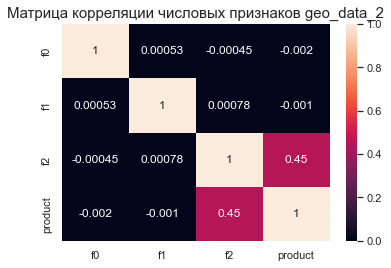

In [12]:
sns.set(font_scale=1)
sns.heatmap(geo_data_2.corr(), annot=True)
plt.title('Матрица корреляции числовых признаков geo_data_2', fontsize=15)

plt.show()

Наиболее ярко выражена корреляция (взаимосвязь) в признаках f2. В geo_data_1 этот признак находится в прямой зависимости с целевым признаком product (объем запасов в скважине). Увидеть зависимость подробнее нам поможет диаграмма рассеяния:

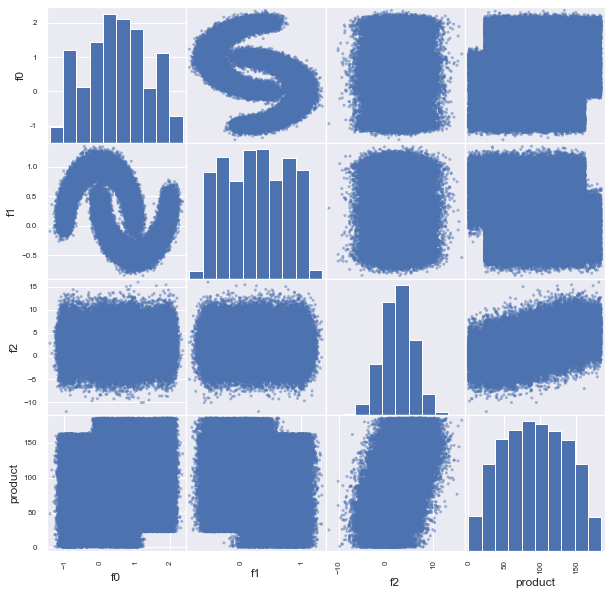

In [13]:
pd.plotting.scatter_matrix(geo_data_0, figsize=(10, 10))
plt.show()

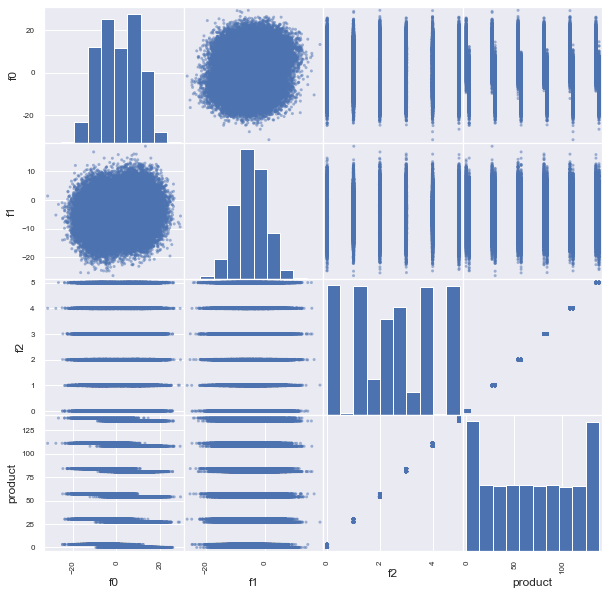

In [14]:
pd.plotting.scatter_matrix(geo_data_1, figsize=(10, 10))
plt.show()

In [15]:
geo_data_1['product'].value_counts()

53.906522     8472
26.953261     8468
84.038886     8431
57.085625     8390
3.179103      8337
80.859783     8320
30.132364     8306
134.766305    8304
110.992147    8303
0.000000      8235
137.945408    8233
107.813044    8201
Name: product, dtype: int64

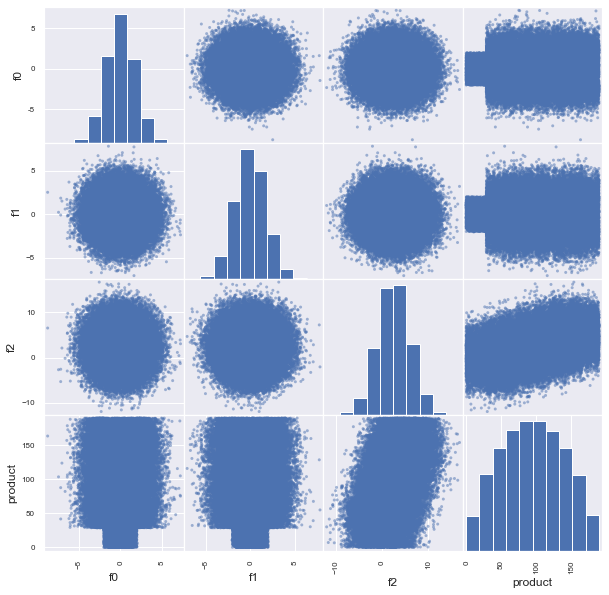

In [16]:
pd.plotting.scatter_matrix(geo_data_2, figsize=(10, 10))
plt.show()

Удалим столбцы, не несущие пользы для обучения будущей модели, поскольку каждый 'id' индивидуален.

In [17]:
geo_data_0.drop(['id'], axis=1, inplace=True)
geo_data_1.drop(['id'], axis=1, inplace=True)
geo_data_2.drop(['id'], axis=1, inplace=True)

- Данные успешно загружены и проанализированы.
- Типы данных указаны верно.
- Явных дубликатов не обнаружены, имеется небольшое количество повторений по id в количестве до 20 дубликатов по всем трем датасетам.
- В датасете geo_data_1 всего 12 уникальных значений product.
- В каждом из трех датасетов по 100 тыс наблюдений пробы нефти в трёх регионах: в каждом 100 000 месторождений/скважин
- Признак F2 находится в сильной зависимости с product, особенно очевидно это в geo_data_1
- Нет полноценной возможности оценить распределения и выбросы, поскольку отсутствует информация о сути признаков.

## Обучение и проверка модели

Напишем функцию, которая:
- указывает признаки (features) и целевой признак (target) для модели
        - Целевой признак, то есть признак, который необходимо определить - это столбец product.
        - Признаками в исходных данных являются остальные столбцы (f0, f1, f2).
- делит датафрейм на обучающую (75% данных) и валидационную (25% данных) выборки в пропорции 3:1
- обучает модель линейной регрессии, делает предсказания на валидационной выборке
- считает и выводит **model** и  **result**:
        - предсказания по валидационной выборке **target_valid**
        - среднее значение предсказаний запаса сырья **product_predicted_mean**
        - RMSE модели **RMSE**

In [18]:
def geo_fit_predict(data):
    
    features = data.drop('product', axis=1)
    target = data['product']
    
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)

    model = LinearRegression()
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)

    RMSE = mean_squared_error(target_valid, predicted_valid)**.5
    
    # средний запас предсказанного сырья
    product_predicted_mean = predicted_valid.mean()
    # параметры на вывод предсказания по валидационной выборке, RMSE, средний запас предсказанного сырья
    result = {'target_valid':target_valid, 'predicted_valid':predicted_valid, 'RMSE':RMSE, 'product_predicted_mean': product_predicted_mean}
  
    return model, result

In [19]:
model_0, result_0 = geo_fit_predict(geo_data_0)
print('Регион 0. Средний запас предсказанного сырья в скважине = {:.3f}, RMSE = {:.3f}'.format(result_0['product_predicted_mean'], result_0['RMSE']))

model_1, result_1 = geo_fit_predict(geo_data_1)
print('Регион 1. Средний запас предсказанного сырья в скважине = {:.3f}, RMSE = {:.3f}'.format(result_1['product_predicted_mean'], result_1['RMSE']))

model_2, result_2 = geo_fit_predict(geo_data_2)
print('Регион 2. Средний запас предсказанного сырья в скважине = {:.3f}, RMSE = {:.3f}'.format(result_2['product_predicted_mean'], result_2['RMSE']))

Регион 0. Средний запас предсказанного сырья в скважине = 92.593, RMSE = 37.579
Регион 1. Средний запас предсказанного сырья в скважине = 68.729, RMSE = 0.893
Регион 2. Средний запас предсказанного сырья в скважине = 94.965, RMSE = 40.030


**Вывод:**

- Согласно предсказаниям модели линейной регрессии в **регионах 0 и 2** в среднем высокий запас сырья в одной скважине (**92.593 и 94.965** тыс.баррелей). В **регионе 1** запас сырья ниже и составляет **68,729** тыс. баррелей.
- Однако не смотря на лучшие показатели в **регионах 0 и 2**, средняя ошибка(корень средней квадратичной ошибки RMSE) составляет куда большую погрешность и превышает показатели **региона 1** почти в 40 раз ( **37.579 и 40.030** против **0.893**). Это может говорить о том, что модель 1 (model_1 для geo_data_1) более точно и качественно предсказывает, чем модели 0 и 2. Определяется это наверняка благодаря исходным данным.

## Подготовка к расчёту прибыли

Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

Подготовим функцию для расчета прибыли с каждого региона. Сохраним все переменные.
- **budget_for_region** - Бюджет на разработку в регионе - 10 млрд руб.
- **wells_total** - количество скважин для геологоразведки (500)
- **wells_top** - количество лучших скважин для разработки, выбранных с помощью машинного обучения (200)
- **profit_from_one_barrel** - прибыль с одного барреля сырья 450 рублей 
- **profit_from_one_product** - доход с каждой единицы продукта 450 000 рублей

- **well_drilling_price** - цена разработки одной скважины в регионе
- **barrel_well** - минимальный объем сырья для безубыточной разработки одной новой скважины
- **profit_region** - минимальный объем сырья с одного региона с 200 лучших скважин

In [20]:
budget_for_region = 10_000_000_000
wells_total = 500
wells_top = 200
profit_from_one_barrel = 450
profit_from_one_product = 450_000

well_drilling_price = budget_for_region / wells_top

barrel_well = well_drilling_price / profit_from_one_product
profit_region = wells_top * barrel_well

print('Цена разработки одной скважины в регионе: {:.0f}'.format(well_drilling_price), ' руб.')
print('Минимальный объем сырья для безубыточной разработки новой скважины: {:.2f}'.format(barrel_well), ' тыс. баррелей')
print('Минимальный объем сырья с одного региона с 200 лучших скважин: {:.2f}'.format(profit_region), 'тыс. баррелей')

Цена разработки одной скважины в регионе: 50000000  руб.
Минимальный объем сырья для безубыточной разработки новой скважины: 111.11  тыс. баррелей
Минимальный объем сырья с одного региона с 200 лучших скважин: 22222.22 тыс. баррелей


**Вывод**

- Для рентабельности разработки скважины необходимо, чтобы минимальный объем сырья в скважине был не менее 111,11 тыс. барелей.
- Согласно предсказаниям моделей в среднем ни в одном из регионов данный показатель не достигнут. 
- Ранее мы выяснили, что средний запас предсказанного сырья в регионах 92.593, 68,729 и 94.965 тыс.баррелей. 
- Следовательно далее нам необходимо выяснить какие скважины проходят минимальный порог рентабельности для безубыточной разработки в объеме сырья не менее 111.11  тыс. баррелей на скважину.

## Расчёт прибыли и рисков 

Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:
- 4.1. Выберите скважины с максимальными значениями предсказаний.
- 4.2. Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.
- 4.3. Рассчитайте прибыль для полученного объёма сырья.

Напишем функцию для расчета прибыли по выбранным скважинам и предсказаниям модели. 

- **target** - целевой признак (product) / список ответов target
- **probabilities** - предсказания модели по валидационной выборке `target_valid`;
- **count** - количество лучших скважин, участвующих в расчёте прибыли `wells_top`.
- **probs_sorted** - отсортированные в порядке убывания по количеству запасов сырья лучшие скважины из предсказаний модели
- **selected** - выбранный по индексу целевой признак (product) Чтобы выбрать ответы, возьмем их индексы из target-а.

In [21]:
# функция для расчета прибыли по выбранным скважинам и предсказаниям модели. 

def revenue(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return (profit_from_one_product * selected.sum() - budget_for_region)

- Применим технику Bootstrap с 1000 выборок по 500 случайных скважин в каждой, чтобы найти распределение прибыли.
- Найдем среднюю прибыль, 95%-й доверительный интервал и риск убытков. 

In [22]:
def profit_risk(target, predictions):

    state = np.random.RandomState(12345)
    bootstrap_samples = 1000 # количество повторений цикла
    
    values = []
    target = target.reset_index(drop=True) # сбрасываем индексы target
    predictions = pd.Series(predictions) # переводим в формат Series
    count = 0 # подсчет убыточных скважин
    
    for i in range(bootstrap_samples):
        target_subsample = target.sample(n=500, replace=True, random_state=state) 
        probs_subsample = predictions[target_subsample.index] # передаем индексы target
        # передаем результат работы функции для расчета прибыли по выбранным скважинам и предсказаниям модели
        profit = revenue(target_subsample, probs_subsample, 200)
                
        if profit < 0:
            count += 1
        values.append(profit)
                
    values = pd.Series(values)
    lower = values.quantile(0.025) #2.5%-квантиль
    upper = values.quantile(0.975) #97.5%-квантиль
    
    # cредняя прибыль
    profit_mean = values.mean()
    # вероятность убытков
    loss_rate = (count / bootstrap_samples) * 100 
    return lower, upper, profit_mean, loss_rate

<div class="alert alert-block alert-info">
    
<b>Совет:</b> Риски можно лаконичнее считать в 1 строку: `(values < 0).mean()`
</div>


In [23]:
lower_0, upper_0, profit_mean_0, loss_rate_0 = profit_risk(result_0['target_valid'], result_0['predicted_valid'])
lower_1, upper_1, profit_mean_1, loss_rate_1 = profit_risk(result_1['target_valid'], result_1['predicted_valid'])
lower_2, upper_2, profit_mean_2, loss_rate_2 = profit_risk(result_2['target_valid'], result_2['predicted_valid'])

In [25]:
final_profit = {'Регион 0':[profit_mean_0/10**6, lower_0/10**6, upper_0/10**6, loss_rate_0],
        'Регион 1':[profit_mean_1/10**6, lower_1/10**6, upper_1/10**6, loss_rate_1],
        'Регион 2':[profit_mean_2/10**6, lower_2/10**6, upper_2/10**6, loss_rate_2]}

final_table = pd.DataFrame(final_profit)

final_table.index = ['Средняя прибыль, млн.руб.', 'Quantile 2.5%, млн.руб.',
                    'Quantile 97.5%, млн.руб.', 'Вероятность убытков, %']

display(final_table)

,Регион 0,Регион 1,Регион 2
"Средняя прибыль, млн.руб.",425.938527,515.222773,435.008363
"Quantile 2.5%, млн.руб.",-102.090095,68.873225,-128.880547
"Quantile 97.5%, млн.руб.",947.976353,931.547591,969.706954
"Вероятность убытков, %",6.000000,1.000000,6.400000


## Вывод

- Был проведен предварительный анализ данных и выявлено, что средний запас предсказанного сырья в регионах варьируется от 68 до 92 тыс. баррелей в скважине. Не смотря на то, что в регионе 1 запас сырья оказался ниже, чем в регионах 0 и 2, средняя ошибка(корень средней квадратичной ошибки RMSE) в регионе 1 также оказалась ниже почти в 40 раз, чем в соседних (RMSE 37.579 и 40.030 против 0.893 тыс. баррелей), что указывает о точности предсказаний для региона 1 и меньших рисках убытков.

- По итогам подготовки к расчёту прибыли выявлено, что для рентабельности разработки скважины необходимо, чтобы минимальный объем сырья в скважине был не менее 111,11 тыс. барелей. Согласно предсказаниям моделей линейной регрессии в среднем ни в одном из регионов данный показатель не достигнут. Далее мы выяснили, что лучшие 200 скважин из случайных 500 проходят минимальный порог рентабельности для безубыточной разработки в объеме сырья не менее 111.11 тыс. баррелей на скважину.

- По условиям задачи следует оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. **Регион 1 / geo_data_1** может быть убыточным с вероятностью лишь 1%, тогда как риски убытков в **Регионе 0 / geo_data_0** и **Регионе 2 / geo_data_2** составляют 6% и 6,4% соответственно. По итогам проекта остается лишь **Регион 1 / geo_data_1** с вероятностью убытков 1%, который удовлетворяет условиям поставленной задачи.

- Помимо самой низкой вероятности убытков при разработке **Региона 1 / geo_data_1** при помощи техники Bootstrap с 1000 выборок выявлено, что в **Регионе 1 / geo_data_1** самые высокие показатели прибыли, которые составляют **515 млн.руб.**, против **426млн.руб.** и **435млн.руб.** в **Регионе 0 / geo_data_0** и **Регионе 2 / geo_data_2**.

- Исходя из вышеизложенного именно **Регион 1 / geo_data_1** следует рекомендовать к разработке.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован